# 2. 다중 선형회귀
Multiple Linear Regression

y = b+m1x1 + m2x2 +…+mnxn

종속변수에 영향을 주는 독립변수가 많기 때문에..!

-  원-핫 인코딩

    표현하고 싶은 값만 1로, 나머지는 모두 0으로


- 다중공선성 Multicollinearity
    
    독립 변수들 간에 서로 강한 상관관계를 가지면서 회귀계수 추정의 오류가 나타나는 문제
    
    하나의 피처가 다른 피처에 영향을 미침
    
    강한 상관관계는 문제가 될 수 있기 때문에 이를 해결해주기 위해서 한 칼럼을 아예 없앰
    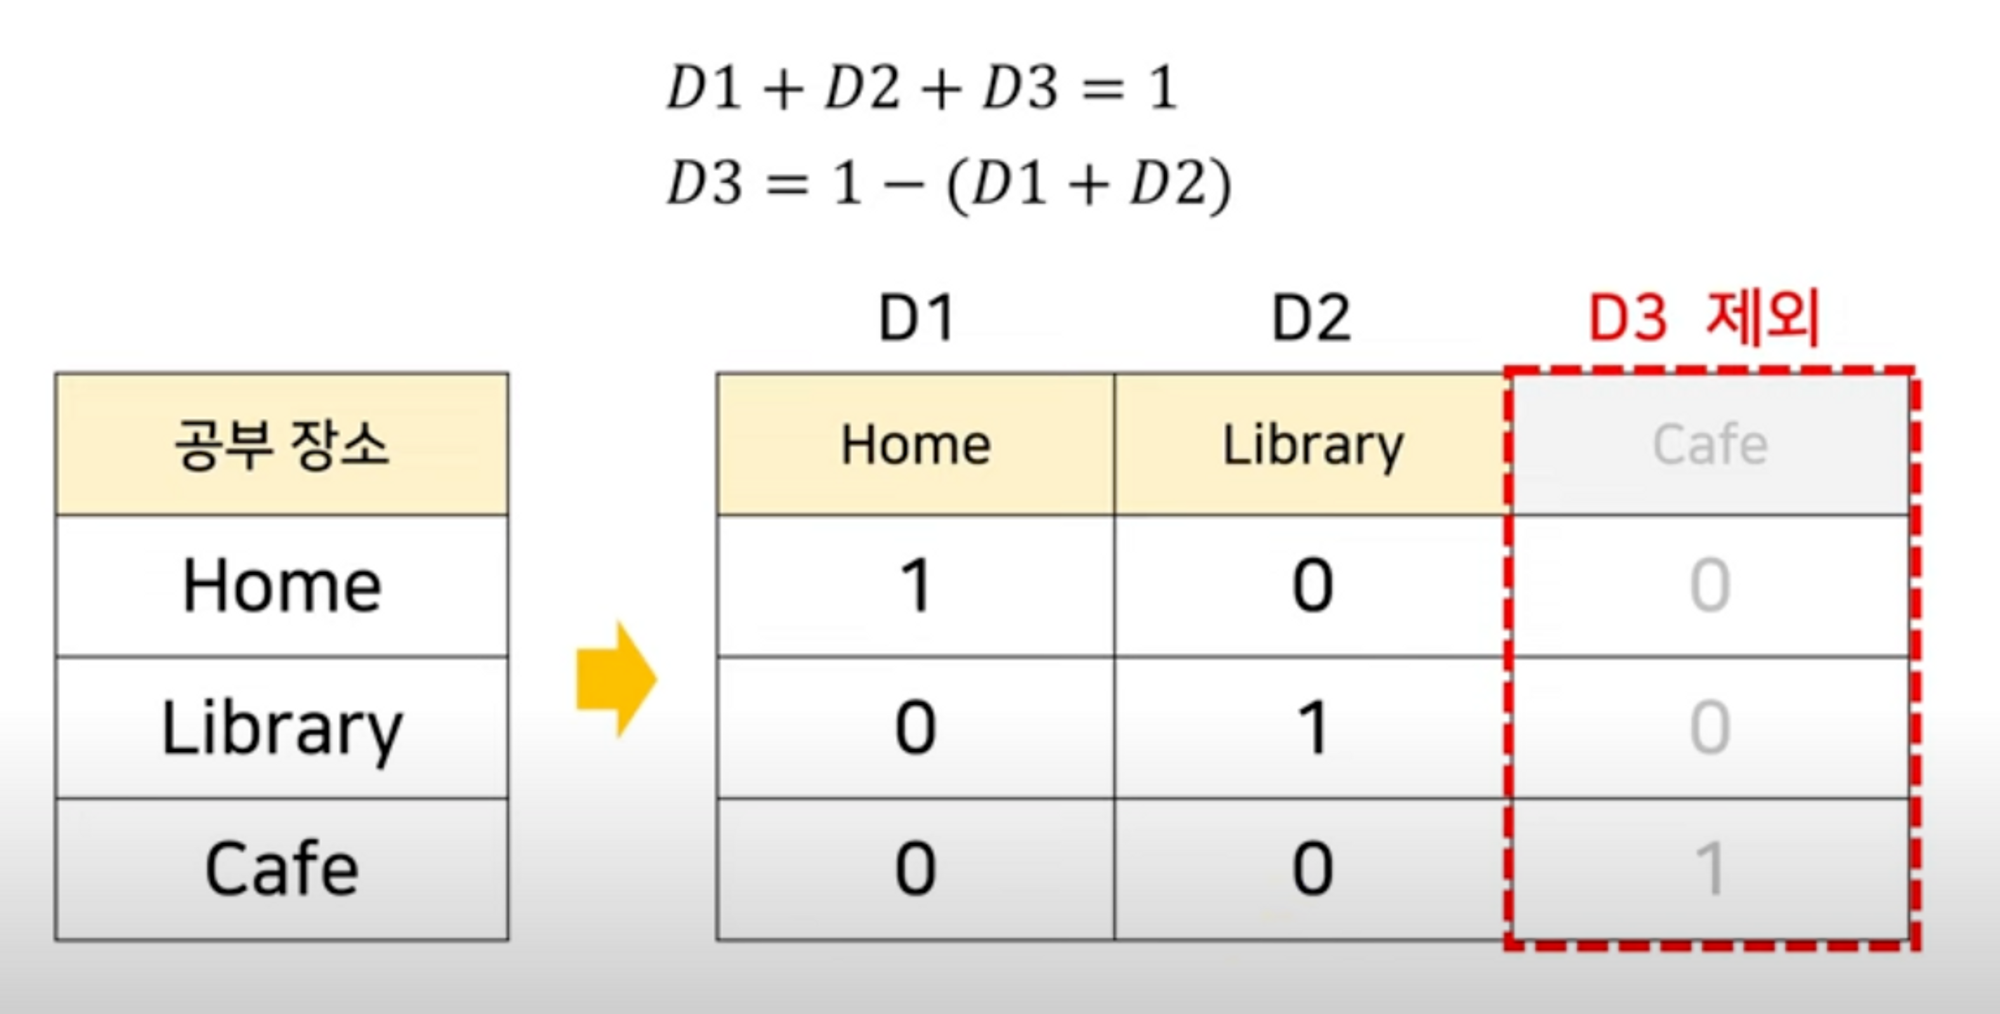
    
    즉 dummy column 이 n개면 n-1개만 사용 → dummy variable trap

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('MultipleLinearRegressionData.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
X

array([[0.5, 3, 'Home'],
       [1.2, 4, 'Library'],
       [1.8, 2, 'Cafe'],
       [2.4, 0, 'Cafe'],
       [2.6, 2, 'Home'],
       [3.2, 0, 'Home'],
       [3.9, 0, 'Library'],
       [4.4, 0, 'Library'],
       [4.5, 5, 'Home'],
       [5.0, 1, 'Cafe'],
       [5.3, 2, 'Cafe'],
       [5.8, 0, 'Cafe'],
       [6.0, 3, 'Library'],
       [6.1, 1, 'Cafe'],
       [6.2, 1, 'Library'],
       [6.9, 4, 'Home'],
       [7.2, 2, 'Cafe'],
       [8.4, 1, 'Home'],
       [8.6, 1, 'Library'],
       [10.0, 0, 'Library']], dtype=object)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),[2])], remainder='passthrough')
# 다중공산성 문제를 해결하기 위해서 OneHotEncoder(drop='first')를 넣어줌
X=ct.fit_transform(X)
X
# 1 0 Home
# 0 1 Library
# 0 0 Cafe

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

## 데이터 세트 분리

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) #훈련 80 테스트 20

## 학습 (다중선형회귀)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 예측값과 실제값 비교(테스트세트)

In [11]:
y_pred = reg.predict(X_test)
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [12]:
y_test

array([ 90,   8, 100,  38])

In [14]:
reg.coef_ #기울기

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [15]:
reg.intercept_ #y절편

5.365006706544754

## 모델평가

In [16]:
reg.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9859956178877445

In [17]:
reg.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9623352565265527